# Union Find
The Union Find algorithm is a data structure for handling disjoint sets by providing 2 key operations on a set of element
- Find: Determine which subset a particular element is in. This can be used for determining if two elements are in the same subset.
- Union: Join two disjoint subsets into a single subset.

## Intuition
The underlying structure of the Union Find algorithm is typically represented as a forest of trees. Each element points to a prent element, and each set is represented by a root node. All elements in the same set share the same root node.

Example of Disjoint Sets:
- Set 1: {1, 2, 3}
- Set 2: {4, 5, 6}

Each element is unique to its set, meaning no element belongs to more than one set, making these sets disjoint.

Example of Non-Disjoint Sets:
- Set 1: {1, 2, 3}
- Set 2: {3, 4, 5}

Here, the element '3' is shared between both sets, meaning they are not disjoint.

Tree representation of disjoint sets.

In [ ]:
!pip install networkx matplotlib

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
graph1 = nx.Graph()
graph2 = nx.Graph()

graph1.add_node(3)
graph1.add_node(9)
graph1.add_node(5)
graph1.add_node(7)

graph2.add_node(6)
graph2.add_node(8)

graph1.add_edge(3, 9)
graph1.add_edge(9, 5)
graph1.add_edge(9, 7)

graph2.add_edge(6, 8)

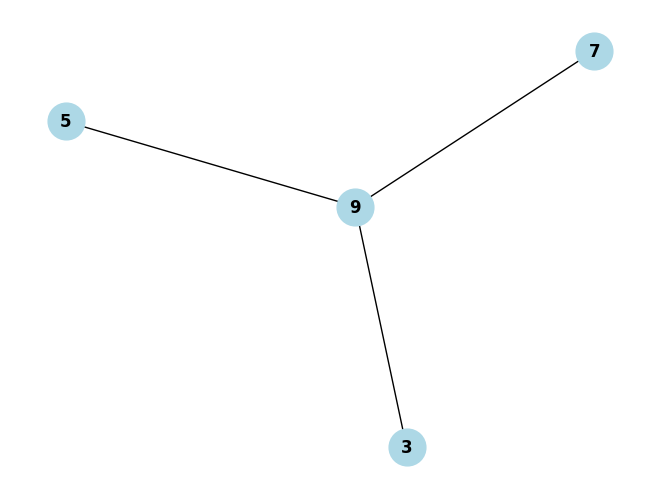

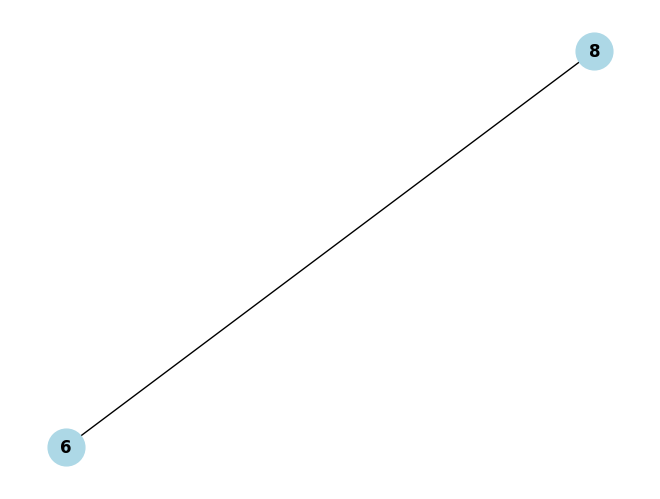

In [11]:
nx.draw(graph1, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.show()
nx.draw(graph2, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.show()

we can show if 3, and 7 is connected

find(3) == find(7): true

is 3 and 6 connected?

find(3) == find(6): false

lets join the group of 3 to group of 6

union(3, 6)

find(3) == find(6): true

## Union Find Structure

In the Union Find data structure, each disjoint set is identified by a unique "parent" root node. All nodes within the same set ultimately point to the same parent node, wich represents the set.

### Representation

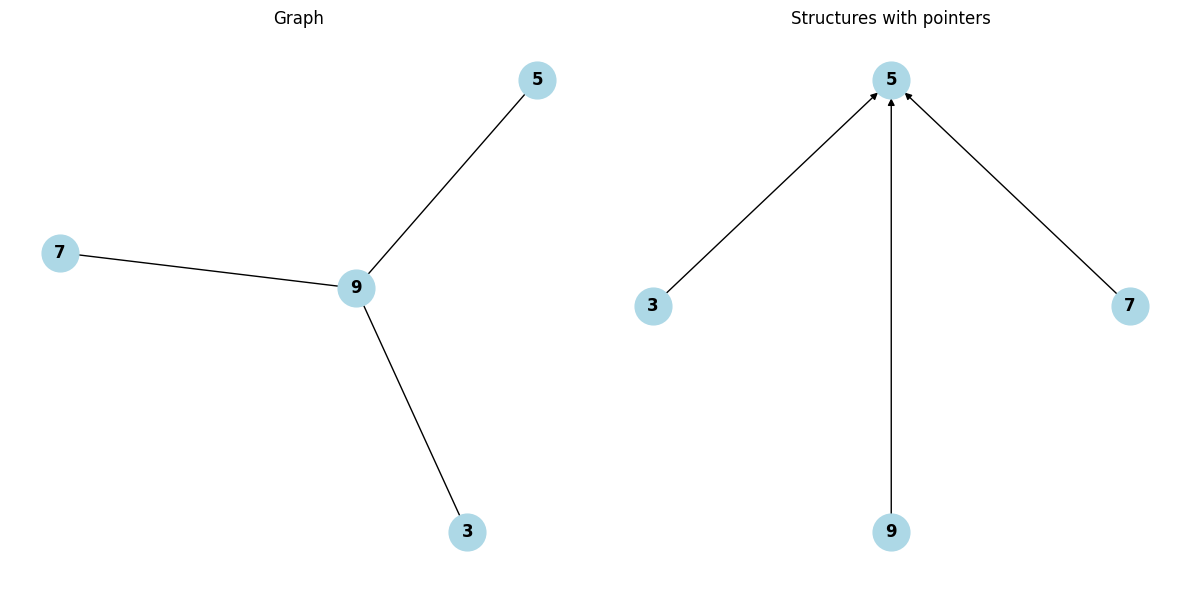

In [56]:
graph3 = nx.DiGraph()

graph3.add_node(3)
graph3.add_node(9)
graph3.add_node(5)
graph3.add_node(7)

graph3.add_edge(3, 5)
graph3.add_edge(9, 5)
graph3.add_edge(7, 5)

pos = {
    5: (0, 1),  # Node 5 at the top
    3: (-1, 0), # Other nodes arranged around node 5
    9: (0, -1),
    7: (1, 0)
}

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

nx.draw(graph1, ax=ax1, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax1.set_title("Graph")

nx.draw(graph3, pos, ax=ax3, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax3.set_title("Structures with pointers")

plt.tight_layout()
plt.show()

On the graph on the left, represents an union find structure where a set is represented as a tree. We can choose any node in the tree to be the parent. For example we picked node 5 as the root.

There is nothing special with node 5, any node can be randomly chosen as the parent.

We can have non-root parents, which is an intermediate node that eventually leads to the root node. For example 7 in the graph below.

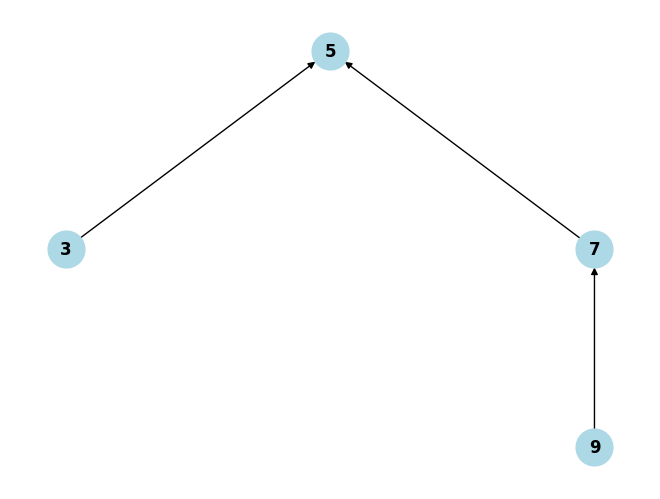

In [63]:
graph4 = nx.DiGraph()

graph4.add_node(3)
graph4.add_node(9)
graph4.add_node(5)
graph4.add_node(7)

graph4.add_edge(3, 5)
graph4.add_edge(7, 5)
graph4.add_edge(9, 7)

pos4 = {
    5: (0, 2),      # Node 5 at the top
    3: (-1, 1),     # Node 3 below and to the left of node 5
    7: (1, 1),      # Node 7 below and to the right of node 5
    9: (1, 0)       # Node 9 below node 7
}

nx.draw(graph4, pos4, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax1.set_title("Graph")

plt.show()

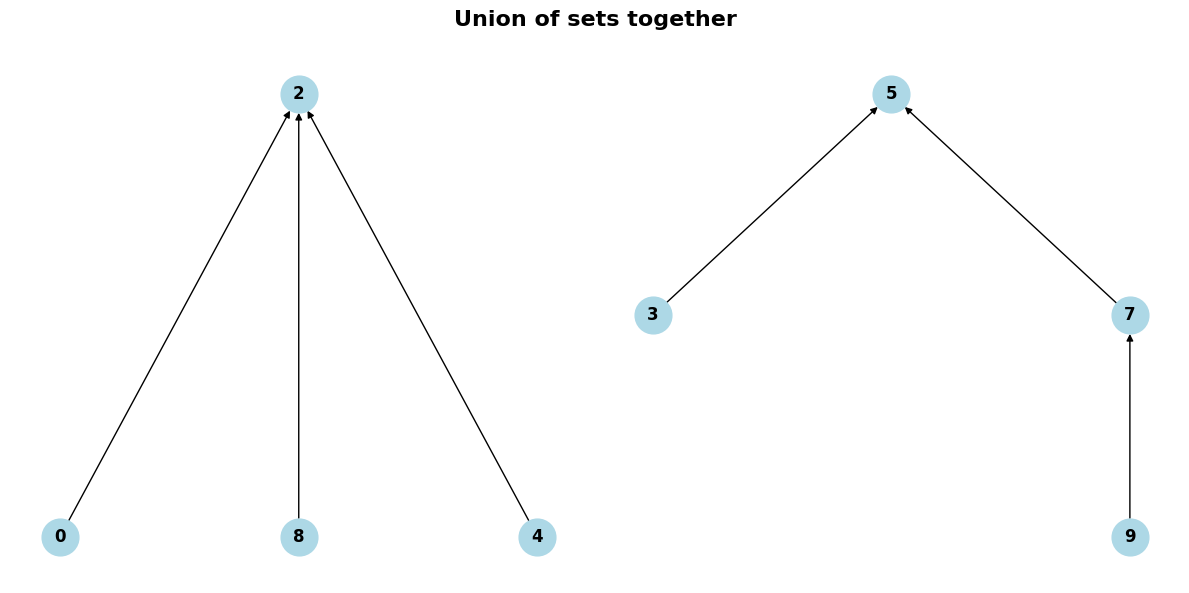

In [77]:
graph5 = nx.DiGraph()

graph5.add_node(2)
graph5.add_node(0)
graph5.add_node(8)
graph5.add_node(4)

graph5.add_edge(0, 2)
graph5.add_edge(8, 2)
graph5.add_edge(4, 2)

pos5 = {
    2: (0, 2),      # Node 5 at the top
    0: (-1, 1),     # Node 3 below and to the left of node 5
    8: (0, 1),      # Node 7 below and to the right of node 5
    4: (1, 1)       # Node 9 below node 7
}

fig, (ax5, ax4) = plt.subplots(1, 2, figsize=(12, 6))

nx.draw(graph5, pos5, ax=ax5, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)

nx.draw(graph4, pos4, ax=ax4, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
fig.suptitle("Union of sets together", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


We can perform union of these 2 disjoint sets, to do this we introduce a pointer that will point from the root of one set to the root of the other set.

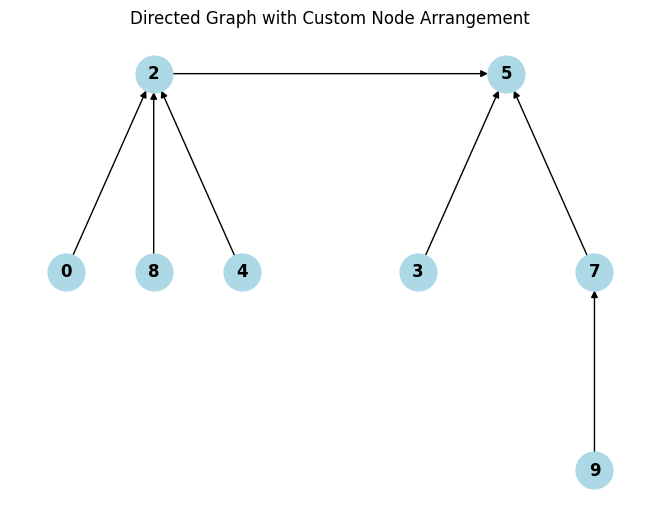

In [105]:
graph6 = nx.DiGraph()

graph6.add_node(2)
graph6.add_node(0)
graph6.add_node(8)
graph6.add_node(4)

graph6.add_edge(0, 2)
graph6.add_edge(8, 2)
graph6.add_edge(4, 2)

graph6.add_node(3)
graph6.add_node(9)
graph6.add_node(5)
graph6.add_node(7)

graph6.add_edge(3, 5)
graph6.add_edge(7, 5)
graph6.add_edge(9, 7)

graph6.add_edge(2, 5)

pos = {
    5: (4, 2),  # Node 5 at the top
    3: (3, 1), # Other nodes arranged around node 5
    9: (5, 0),
    7: (5, 1),
    2: (0, 2),      # Node 5 at the top
    0: (-1, 1),     # Node 3 below and to the left of node 5
    8: (0, 1),      # Node 7 below and to the right of node 5
    4: (1, 1)     # Node 9 below node 7
}

nx.draw(graph6, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Union of sets together")

plt.show()

### Quick Union Find

#### find method: 
This operation traverse the chain of parent pointers fro a given element untill reaching a root element, which is identified when a node's parent is itself. This root represents the set of which the element belongs to.

#### union Method: 
This operation merges 2 disjoint sets. It changes the root element of a disjoint set to the root element of another disjoint set.
Consequently after performing the union method, any element in the 2 disjoint set now share a common root.

#### Algorithm:
1. Initialization:
Initialize a parent array where each element points to itself. So initally each element is a disjoint set where the root it itself.
3. Union Operations
Iterate through the array of edges, and perform union on the element of the two end of each edge. This operation ensures that nodes connected by an edge will end up in the same set, identified by a common root.

In [175]:
class UnionFind:
    def __init__(self, numOfElements):
        self.parent = self.__initialize(numOfElements)
        self.count = numOfElements

    def __initialize(self, numOfElements):
        return [i for i in range(numOfElements)]

    def find(self, i):
        if self.parent[i] == i:
            return i
        else:
            return self.find(self.parent[i])

    def union(self, i, j):
        self.parent[self.find(i)] = self.find(j)

In [176]:
edges = [
    [3, 0],
    [0, 1],
    [0, 2]
]
numberOfElements = 4
uf = UnionFind(numberOfElements)

In [177]:
for node1, node2 in edges:
    uf.union(node1, node2)

In [178]:
uf.parent

[1, 2, 2, 0]

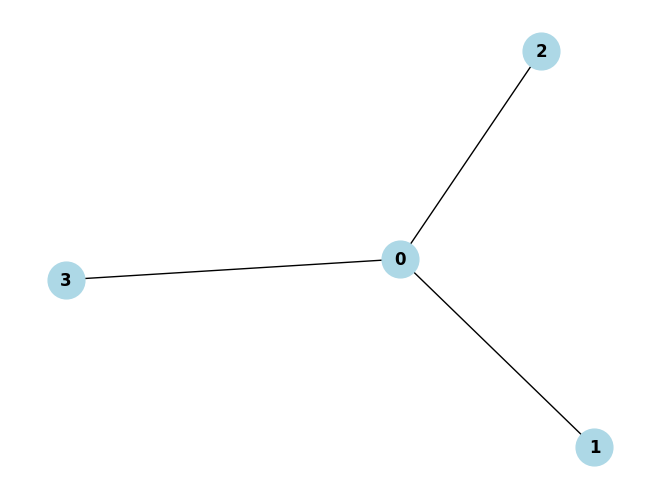

In [260]:
nodes = set()

graph6 = nx.Graph()
for edge in edges:
    nodes.add(edge[0])
    nodes.add(edge[1])
    
for node in nodes:
    graph6.add_node(node)

for edge in edges:
    graph6.add_edge(edge[0], edge[1])


nx.draw(graph6, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)

plt.show()

### Tall Trees
The drawback of quick union find is that we can encounter an edge case where the tree becomes very deep, resembling a linked list.

In [179]:
edges = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6],
    [6, 7]
]
numberOfElements = 8
uf = UnionFind(numberOfElements)

In [180]:
for node1, node2 in edges:
    uf.union(node1, node2)

In [182]:
uf.parent

[1, 2, 3, 4, 5, 6, 7, 7]

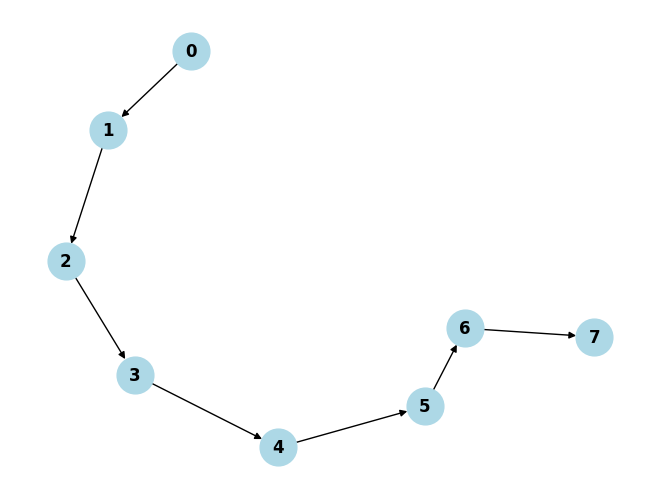

In [184]:
nodes = set()

graph6 = nx.DiGraph()
for edge in edges:
    nodes.add(edge[0])
    nodes.add(edge[1])
    
for node in nodes:
    graph6.add_node(node)

for edge in edges:
    graph6.add_edge(edge[0], edge[1])


nx.draw(graph6, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)

plt.show()

A tall will negatively impact the performance of the find operation. Since the tree is unbalance, in order to reach the root node, the find operation will need to traverse all the way up through every intermediate parent node to the root node resulting in a time complexity of O(n).

## Weighted Union Find
To address the issue of tall trees in Quick Union find we introduce path compression. This is implemented in weighted union find where we keep track of the size of each component. We modify the union operation where the larger tree becomes the parent of the smaller tree. The beauty of path compression is that it prevents the case where a leaf node will need to traverse through all the intermediate parents to reach the root node.

Time complexity of find() will be reduced to O(logn).

To achieve this we introduce an array called size to keep a record of the size of the trees.

In [234]:
class UnionFind:
    def __init__(self, numOfElements):
        self.parent = self.__initialize(numOfElements)
        self.size = numOfElements*[1]
        self.count = numOfElements

    def __initialize(self, numOfElements):
        return [i for i in range(numOfElements)]

    def find(self, i):
        if self.parent[i] == i:
            return i
        else:
            return self.find(self.parent[i])

    def union(self, i, j):
        iRoot = self.find(i)
        jRoot = self.find(j)
        if iRoot == jRoot:
            return

        if self.size[iRoot] > self.size[jRoot]:
            self.parent[jRoot] = iRoot
            self.size[iRoot] += self.size[jRoot]
        else:
            self.parent[iRoot] = jRoot
            self.size[jRoot] += self.size[iRoot]


In [235]:
edges = [
    [0, 1],
    [1, 2],
    [2, 3],
    [3, 4],
    [4, 5],
    [5, 6],
    [6, 7]
]
numberOfElements = 8
uf = UnionFind(numberOfElements)

In [236]:
for node1, node2 in edges:
    uf.union(node1, node2)

In [237]:
uf.parent

[1, 1, 1, 1, 1, 1, 1, 1]

In [238]:
uf.size

[1, 8, 1, 1, 1, 1, 1, 1]

In [240]:
edges = [
    [0, 2],
    [1, 4],
    [1, 5],
    [2, 3],
    [2, 7],
    [4, 8],
    [5, 8]
]
numberOfElements = 9
uf = UnionFind(numberOfElements)

In [241]:
for node1, node2 in edges:
    uf.union(node1, node2)

In [242]:
uf.parent

[2, 4, 2, 2, 4, 4, 6, 2, 4]

In [243]:
uf.size

[1, 1, 4, 1, 4, 1, 1, 1, 1]

# Cycle detection
Union find can be effectively used for cycle detection in graphs. If you add an edge and the both nodes of the edge are in the same set, then the form a cycle.

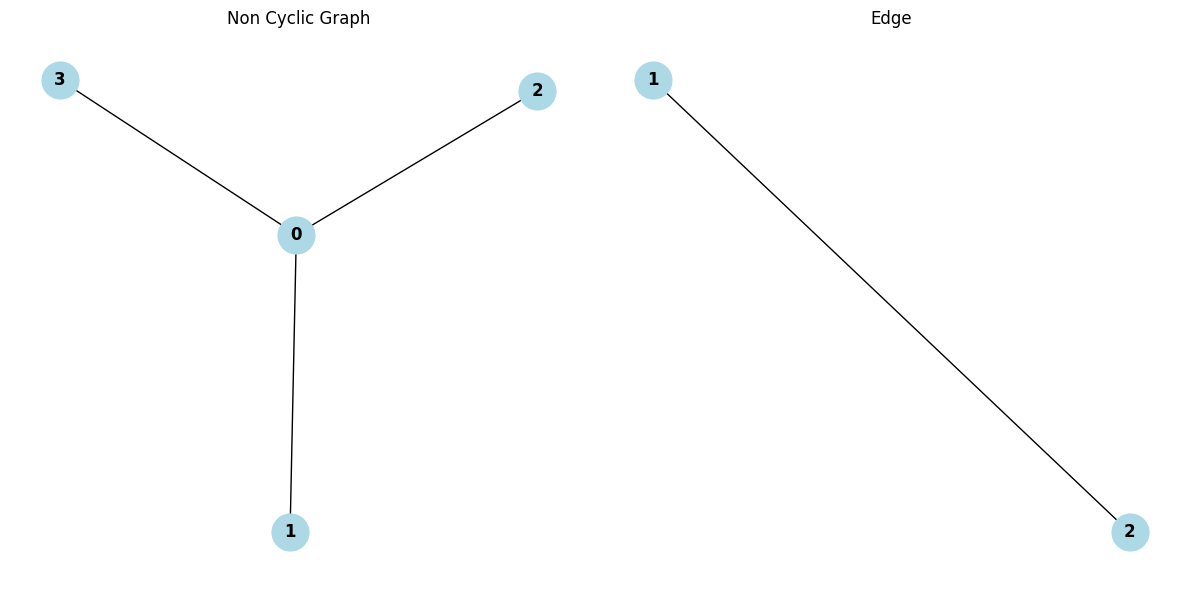

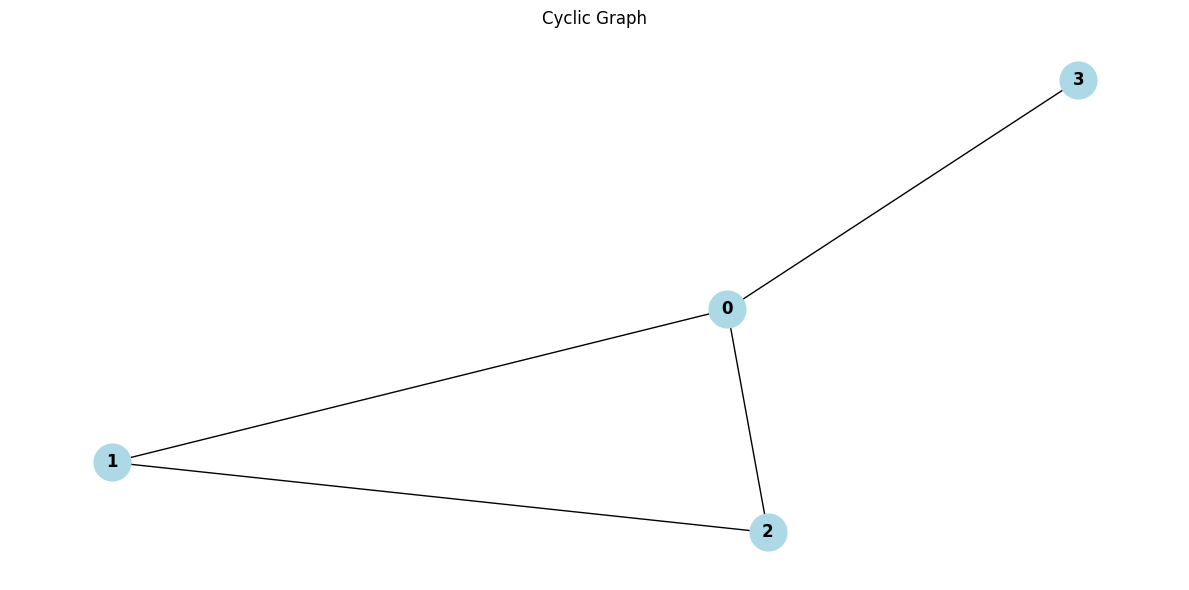

In [256]:
NonCyclic = nx.Graph()

NonCyclic.add_node(0)
NonCyclic.add_node(1)
NonCyclic.add_node(2)
NonCyclic.add_node(3)

NonCyclic.add_edge(1, 0)
NonCyclic.add_edge(2, 0)
NonCyclic.add_edge(3, 0)

pos = {
    0: (0, 1),  # Node 5 at the top
    1: (-1, 0), # Other nodes arranged around node 5
    2: (0, -1),
    3: (1, 0)
}

Edge = nx.Graph()

Edge.add_node(1)
Edge.add_node(2)

Edge.add_edge(1, 2)

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

nx.draw(NonCyclic, ax=ax1, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax1.set_title("Non Cyclic Graph")

nx.draw(Edge, pos, ax=ax3, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax3.set_title("Edge")

plt.tight_layout()
plt.show()

Cyclic = nx.Graph()

Cyclic.add_node(0)
Cyclic.add_node(1)
Cyclic.add_node(2)
Cyclic.add_node(3)

Cyclic.add_edge(1, 0)
Cyclic.add_edge(2, 0)
Cyclic.add_edge(3, 0)
Cyclic.add_edge(1, 2)

fig, (ax1) = plt.subplots(1, figsize=(12, 6))

nx.draw(Cyclic, ax=ax1, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax1.set_title("Cyclic Graph")

plt.tight_layout()
plt.show()

In [257]:
edges = [
    [0, 1],
    [0, 2],
    [0, 3]
]
numberOfElements = 4
uf = UnionFind(numberOfElements)

In [258]:
for node1, node2 in edges:
    uf.union(node1, node2)

In [259]:
uf.find(1) == uf.find(2)

True

I'd like to thank the following resources which were referenced in this article:

- Yumin Lee's [Medium article](https://yuminlee2.medium.com/union-find-algorithm-ffa9cd7d2dba)
- Base Case's [YouTube tutorial](https://youtu.be/fZNRMpVlJZs?feature=shared) 